In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
class Perceptron(object):
    
    def __init__(self ,eta = 0.01 ,n_iter = 10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self,X,y):
        self.weight = np.zeros(X.shape[1] + 1)
        self.errors = []
        
        for _ in range(self.n_iter):
            error = 0
            
            for xi,target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.weight[1:] += update * xi
                self.weight[0] += update
                error += int(update != 0)
            self.errors.append(error)
        return self
    
    
    def net_input(self,X):
        return (np.dot(X,self.weight[1:])) + self.weight[0]
    
    
    def predict(self,X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [5]:
import pandas as pd

In [7]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [23]:
df.head(10)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [9]:
y = df.iloc[0:100,4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100,[0,2]].values

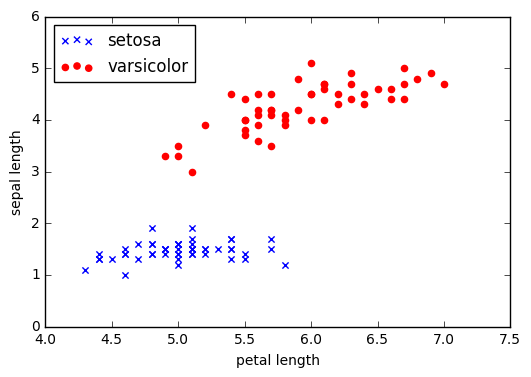

In [11]:
plt.scatter(X[:50,0],X[:50,1],color='blue',marker='x',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='red',marker='o',label='varsicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')

In [14]:
ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X,y)

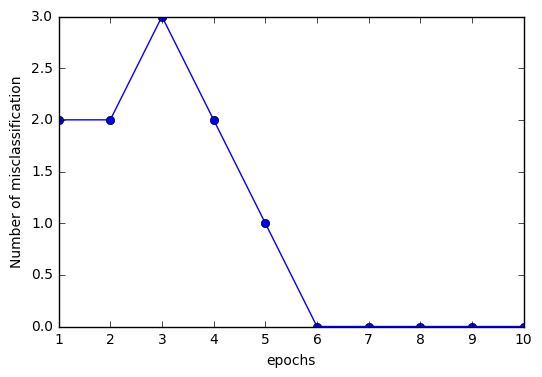

In [15]:
plt.plot(range(1,len(ppn.errors) + 1), ppn.errors, marker='o')
plt.xlabel('epochs')
plt.ylabel('Number of misclassification')

In [16]:
from matplotlib.colors import ListedColormap

In [21]:
def plot_decision_region(X ,y ,classifier ,resolution = 0.02):
    
    # setup marker generator and color map
    markers = ('s' ,'x' ,'o' ,'^' ,'v')
    colors = ('red' ,'blue' ,'lightgreen' ,'gray' ,'cyan')
    
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                        alpha=0.8, c=cmap(idx),
                                marker=markers[idx], label=cl)

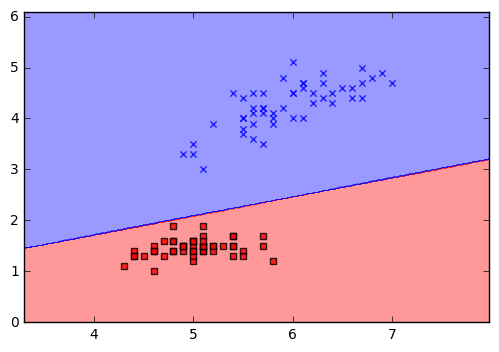

In [22]:
plot_decision_region(X,y,ppn)